In [ ]:
import pandas as pd 
import statistics as sts 
import math 
import numpy as np 
import matplotlib.pyplot as plt #grafy
import csv 

In [ ]:
#url adresy
urls1 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2001.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2002.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2003.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2004.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2005.csv"] #01-05
urls2 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2006.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2007.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2008.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2009.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2010.csv"] #06-10
urls3 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2011.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2012.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2013.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2014.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2015.csv"] #11-15
urls4 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2016.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2017.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2018.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2019.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2020.csv"] #16-20

In [ ]:
def KPHurls(urls): #funkce načítá do DF, maže sloupce, spojuje
    dfpole = []
    for url in urls: 
        df = pd.read_csv(url) #načítá csv soubory
        df_bez = df.drop(["nub", "energy", "mode", "speechiness", "acousticness", "valence", "time_signature"], axis=1) # maže sloupce podle jména
        df_bez = df_bez[~df_bez["artist/s"].str.contains("코케")] #maže sloupce obsahující (chyběly hodnoty=>dělalo bordel)
        df_bez = df_bez[~df_bez["artist/s"].str.contains("Various Artists")] #-//-
        dfpole.append(df_bez) # přidává na konec seznamu dfpole
    merged_dfpole = pd.concat(dfpole, ignore_index=True) # spojení dat 
    return merged_dfpole

kph1 = KPHurls(urls1) #1-5
kph2 = KPHurls(urls2) #6-10
kph3 = KPHurls(urls3) #11-15
kph4 = KPHurls(urls4) #15-20

#print(kph1.to_string())

In [ ]:
def top10(kph): #funkce na top 10 ze seznamu
  kph["artists_list"] = kph["artist/s"].str.split(",")  #v jendom řádku je více hodnot
  artist_counts = kph.explode("artists_list")["artists_list"].value_counts() # počty výskytů každého 
  artist_countsTOP = artist_counts.head(10) #top 10
  return artist_countsTOP

kph1top = top10(kph1)
kph2top = top10(kph2)
kph3top = top10(kph3)
kph4top = top10(kph4)

#print(kph2top)

<ipython-input-10-bd8f8fb37437>:13: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  plt.tight_layout()
<ipython-input-10-bd8f8fb37437>:13: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-bd8f8fb37437>:13: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  plt.tight_layout()
<ipython-input-10-bd8f8fb37437>:13: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-bd8f8fb37437>:13: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-10-bd8f8fb37437>:13: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


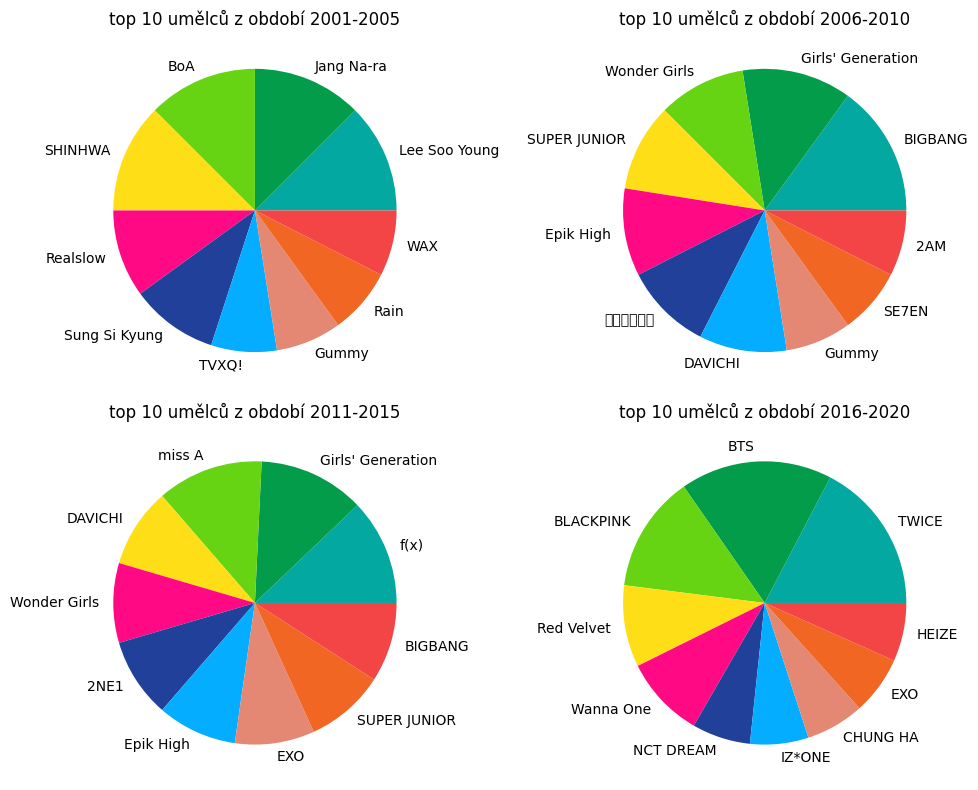

In [ ]:
#4 hezký grafy
barvy = ["#03a8a0", "#039c4b", "#66d313", "#fedf17", "#ff0984", "#21409a", "#04adff", "#e48873", "#f16623", "#f44546"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 mřížka grafu
axs[0, 0].pie(kph1top, labels=kph1top.index, colors=barvy)
axs[0, 0].set_title("top 10 umělců z období 2001-2005")  
axs[0, 1].pie(kph2top, labels=kph2top.index, colors=barvy)
axs[0, 1].set_title("top 10 umělců z období 2006-2010") 
axs[1, 0].pie(kph3top, labels=kph3top.index, colors=barvy)
axs[1, 0].set_title("top 10 umělců z období 2011-2015")
axs[1, 1].pie(kph4top, labels=kph4top.index, colors=barvy)
axs[1, 1].set_title("top 10 umělců z období 2016-2020")

plt.tight_layout() 
plt.show()

In [ ]:
#mediany a průměry - počítání
def mediany(kph):
    kategorie = ["key", "danceability", "loudness", "tempo", "duration_ms"]
    med = {} #slovník
    for sloup in kategorie:
        med[sloup] = kph[sloup].median() #v každym opakování se počítá medián pro aktuální sloupec
    return med

def prumery(kph):
    kategorie = ["key", "danceability", "loudness", "tempo", "duration_ms"]
    pru = {} #slovník
    for sloup in kategorie:
        pru[sloup] = kph[sloup].mean()
    return pru

kph1_med = mediany(kph1)
kph1_pru = prumery(kph1)

kph2_med = mediany(kph2)
kph2_pru = prumery(kph2)

kph3_med = mediany(kph3)
kph3_pru = prumery(kph3)

kph4_med = mediany(kph4)
kph4_pru = prumery(kph4)

print(kph1_med)
print(kph1_pru)
#print(kph2_pru)
#print(kph3_med)
#print(kph3_pru)
#print(kph4_med)
#print(kph4_pru)

{'key': 7.0, 'danceability': 0.6225, 'loudness': -5.4575, 'tempo': 116.61349999999999, 'duration_ms': 243441.0}
{'key': 6.2164179104477615, 'danceability': 0.6046044776119402, 'loudness': -5.895380597014925, 'tempo': 118.13074626865672, 'duration_ms': 245626.6567164179}


In [ ]:
#pomocí if/elif/else kouknout, jak moc se medián a průměr liší - má/nemá extrémy
def porovnaX(kph_med, kph_pru):
    kategorie = ["key", "danceability", "loudness", "tempo", "duration_ms"] #co hodnotim
    
    for kat in kategorie:
        rozdil = abs(kph_med[kat] - kph_pru[kat])
        
        if kat == "key":
            if rozdil > 0.2:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "danceability":
            if rozdil > 0.02:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "loudness":
            if rozdil > 0.2:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "tempo":
            if rozdil > 1.5:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "duration_ms":
            if rozdil > 5000:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))

porovnaX(kph1_med, kph1_pru)
#porovnaX(kph2_med, kph2_pru)
#porovnaX(kph3_med, kph3_pru)
#porovnaX(kph4_med, kph4_pru)


key má extrémní hodnoty
danceability nemá extrémní hodnoty
loudness má extrémní hodnoty
tempo má extrémní hodnoty
duration_ms nemá extrémní hodnoty
